In [15]:
import pandas as pd
import numpy as np
import joblib
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

# Obtain $y$

In [16]:
identifier = 1

In [17]:
name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
             'sandal', 'shirt', 'sneaker', 'bag', 'boot']
identifier_name = name_list[identifier]

root = '/net/leksai/nips/result/fmnist'
# recall_rec = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(0))['Reconstruction Model']
recall_oc = pd.read_pickle(Path(root)/'recall_df_{}_90.pkl'.format(identifier))['One Class Model']

In [18]:
recall_oc

,"A/N = 0.1, Abnormal: 0","A/N = 0.1, Abnormal: 2","A/N = 0.1, Abnormal: 3","A/N = 0.1, Abnormal: 4","A/N = 0.1, Abnormal: 5","A/N = 0.1, Abnormal: 6","A/N = 0.1, Abnormal: 7","A/N = 0.1, Abnormal: 8","A/N = 0.1, Abnormal: 9",A/N = 0
0,1.000,0.999,0.999,0.994,0.960,0.997,0.964,0.985,0.982,0.962
2,1.000,1.000,1.000,1.000,0.984,1.000,0.990,0.999,0.999,0.998
3,0.858,0.841,0.997,0.865,0.849,0.878,0.839,0.826,0.873,0.816
4,0.997,0.999,0.999,1.000,0.991,1.000,0.992,0.997,0.998,0.990
5,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
6,0.998,0.998,1.000,0.999,0.970,0.999,0.973,0.988,0.991,0.972
7,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
8,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
9,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [19]:
ind_list_ = list(recall_oc.index)
y_un = {k: {} for k in ind_list_}
y_semi = {k: {} for k in ind_list_}

ind_to_df_ind = {0: 'A/N = 0.1, Abnormal: 0',
                 1: 'A/N = 0.1, Abnormal: 1',
                 2: 'A/N = 0.1, Abnormal: 2',
                 3: 'A/N = 0.1, Abnormal: 3',
                 4: 'A/N = 0.1, Abnormal: 4',
                 5: 'A/N = 0.1, Abnormal: 5',
                 6: 'A/N = 0.1, Abnormal: 6',
                 7: 'A/N = 0.1, Abnormal: 7',
                 8: 'A/N = 0.1, Abnormal: 8',
                 9: 'A/N = 0.1, Abnormal: 9',}

# y_un[i] refers to the unsupervised results on test abnormal i
# y_semi[i] refers to the semi-supervised results on test abnormal i
for i in ind_list_:
    y_un[i] = [recall_oc.loc[i, 'A/N = 0']] * 9
    y_semi[i] = list(recall_oc[[ind_to_df_ind[i] for i in ind_list_]].loc[i, :])

# Obtain $x$

In [6]:
ind_list_

[0, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
div_joint_oc = joblib.load('div_joint_oc.pkl')
div_margin_oc = joblib.load('div_margin_oc.pkl')

name_list = ['tshirt', 'trouser', 'pullover', 'dress', 'coat',
             'sandal', 'shirt', 'sneaker', 'bag', 'boot']

x_joint = {k: {} for k in ind_list_}
x_margin = {k: {} for k in ind_list_}

for i in ind_list_:
    name = name_list[i]
    x_joint[i] = list(div_joint_oc[name].values())
    x_margin[i] = list(div_margin_oc[name].values())

# Draw Plots with Connected Points

In [29]:
joint_x = np.array(x_joint[0])
y1 = np.array(y_semi[0])

In [34]:
joint_x

array([ 0.06442657, 10.85160406,  6.96533426, 10.81890006, 14.35105774,
        4.62682769, 21.45130729, 14.15794236, 16.47658625])

In [35]:
np.sort(joint_x)

array([ 0.06442657,  4.62682769,  6.96533426, 10.81890006, 10.85160406,
       14.15794236, 14.35105774, 16.47658625, 21.45130729])

In [36]:
joint_x

array([ 0.06442657, 10.85160406,  6.96533426, 10.81890006, 14.35105774,
        4.62682769, 21.45130729, 14.15794236, 16.47658625])

In [33]:
y1

array([1.   , 0.999, 0.999, 0.994, 0.96 , 0.997, 0.964, 0.985, 0.982])

In [32]:
y1[np.argsort(joint_x)]

array([1.   , 0.997, 0.999, 0.994, 0.999, 0.985, 0.96 , 0.982, 0.964])

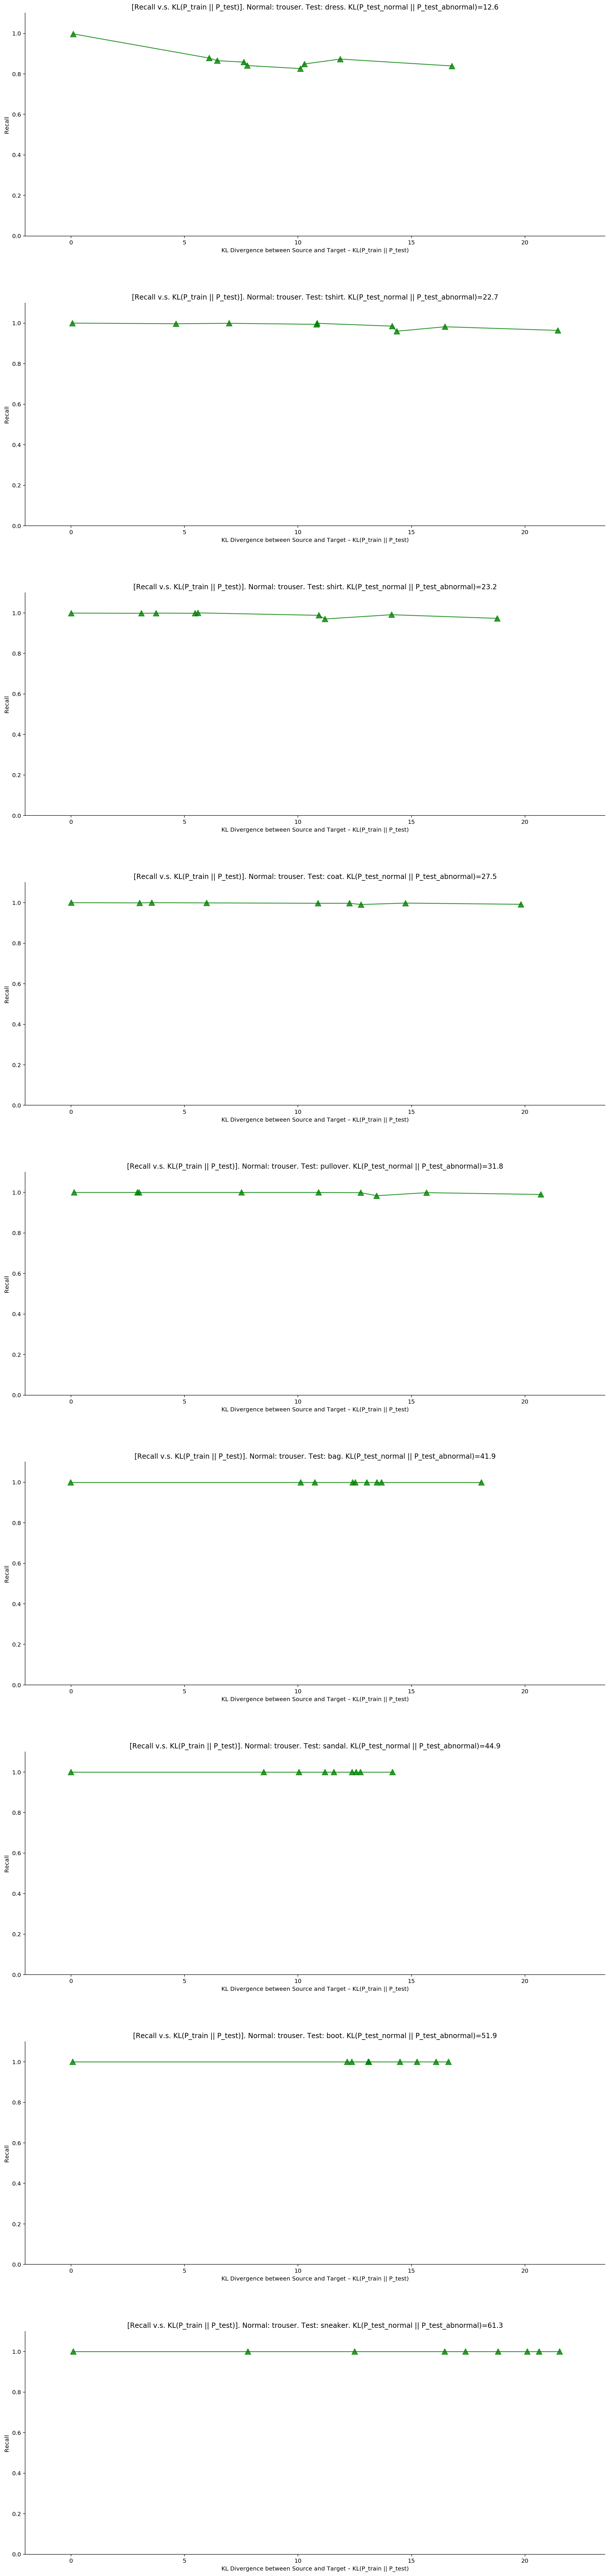

In [37]:
n = len(i_list)
fig, axes = plt.subplots(ncols=1, nrows=n, figsize=(18, 9 * n))
plt.subplots_adjust(hspace=0.3)

for ind, i in enumerate(i_list):
    y0 = np.array(y_un[i])
    y1 = np.array(y_semi[i])
    joint_x = np.array(x_joint[i])
    margin_x = np.array(x_margin[i])
    joint_x_ = np.sort(joint_x)
    y1_ = y1[np.argsort(joint_x)]

#     dy = y1 - y0



    axes[ind].plot(joint_x_, y1_, '-^', color='green', markersize=10, alpha=0.8)
    

    axes[ind].set_ylim(0, 1.1)
    axes[ind].set_xlim(xlim_left, xlim_right)

    sns.despine()
    axes[ind].set_ylabel('Recall')
    axes[ind].set_xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
    axes[ind].set_title('[Recall v.s. KL(P_train || P_test)]. Normal: {}. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(identifier_name, name_list[i], round(margin_test_for_identifier[i], 1)))

# Draw Plots for Joint Divergence

In [8]:
margin_test_for_identifier = joblib.load('margin_test_for_identifier_oc.pkl')
i_list = list(np.argsort(margin_test_for_identifier))
i_list.remove(identifier)

In [9]:
temp = []
for i in i_list:
    temp.extend(x_joint[i])
xlim_left = min(temp) - 2
xlim_right = max(temp) + 2

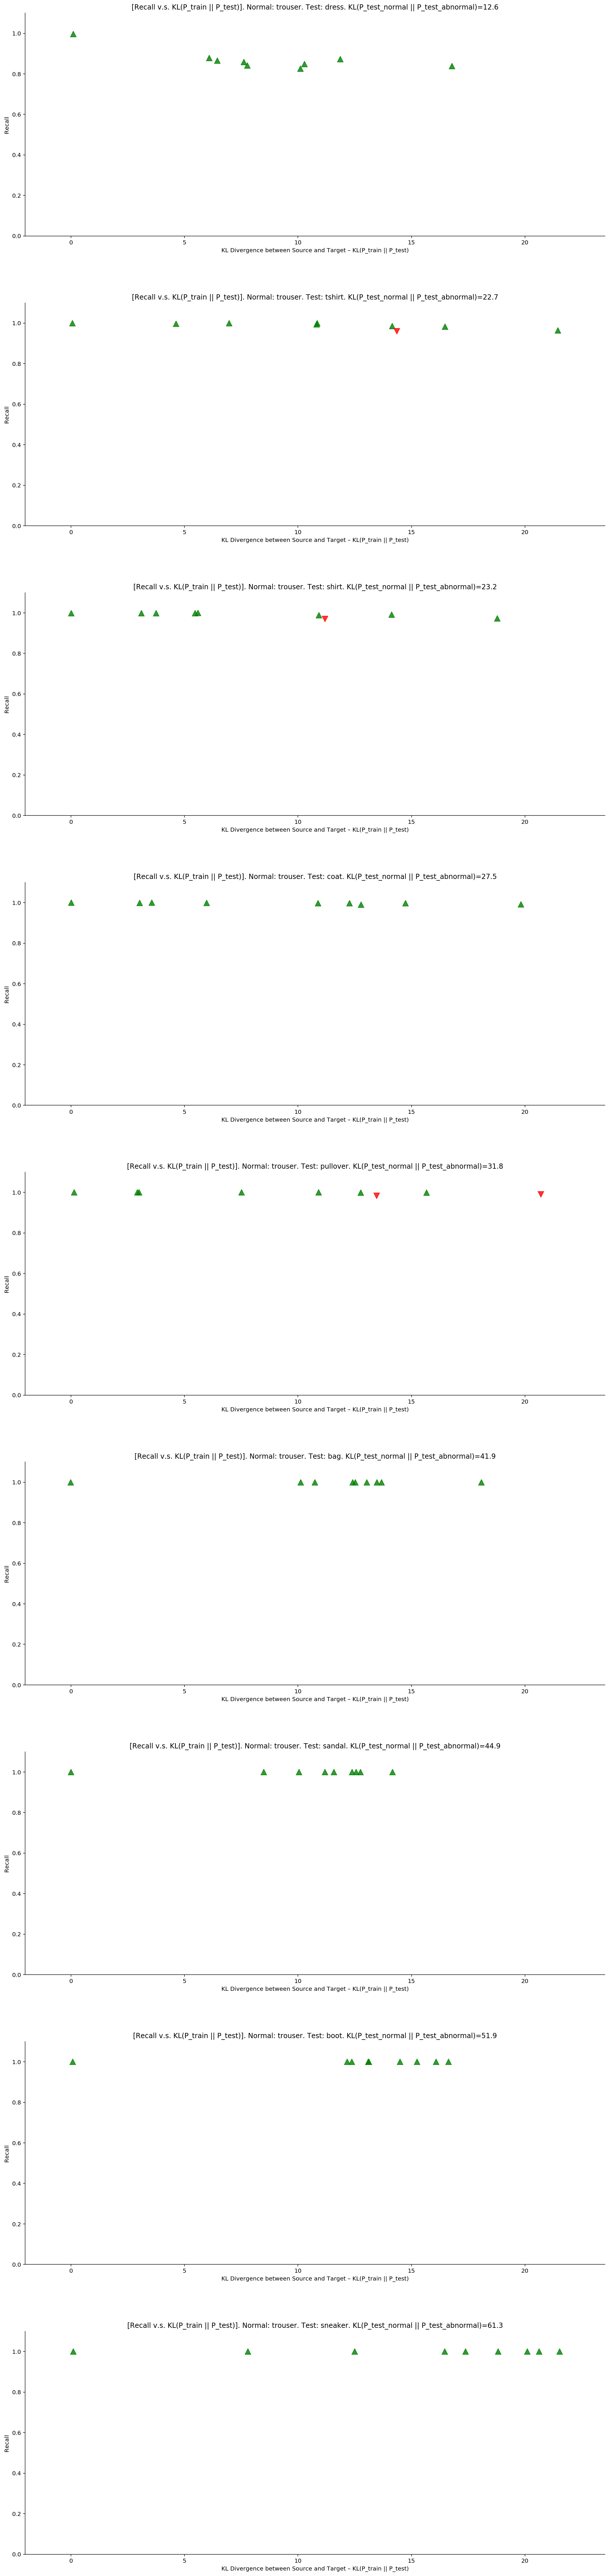

In [23]:
n = len(i_list)
fig, axes = plt.subplots(ncols=1, nrows=n, figsize=(18, 9 * n))
plt.subplots_adjust(hspace=0.3)

for ind, i in enumerate(i_list):
    y0 = np.array(y_un[i])
    y1 = np.array(y_semi[i])
    joint_x = np.array(x_joint[i])
    margin_x = np.array(x_margin[i])

    dy = y1 - y0
    pos_ind = np.where(dy >= 0)[0]
    nega_ind = np.where(dy < 0)[0]

    axes[ind].plot(joint_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
    axes[ind].plot(joint_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
    axes[ind].plot(joint_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
    axes[ind].plot(joint_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)
    
    for j in range(len(y0)):
        if j == ind_list_.index(i):
            axes[ind].arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
                  width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
        elif y0[j] - y1[j] >= 0:
            axes[ind].arrow(joint_x[j], y0[j], 0, y1[j] - y0[j],
                  width=0.001, length_includes_head=True, head_length=0.01, color='red')
        else:
            axes[ind].arrow(joint_x[j], y0[j], 0, y1[j]-y0[j],
                  width=0.001, length_includes_head=True, head_length=0.01, color='green')

    axes[ind].set_ylim(0, 1.1)
    axes[ind].set_xlim(xlim_left, xlim_right)

    sns.despine()
    axes[ind].set_ylabel('Recall')
    axes[ind].set_xlabel('KL Divergence between Source and Target – KL(P_train || P_test)')
    axes[ind].set_title('[Recall v.s. KL(P_train || P_test)]. Normal: {}. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(identifier_name, name_list[i], round(margin_test_for_identifier[i], 1)))

# Draw Plots for Marginal Divergence

In [11]:
temp = []
for i in i_list:
    temp.extend(x_margin[i])
xlim_left = min(temp) - 2
xlim_right = max(temp) + 2

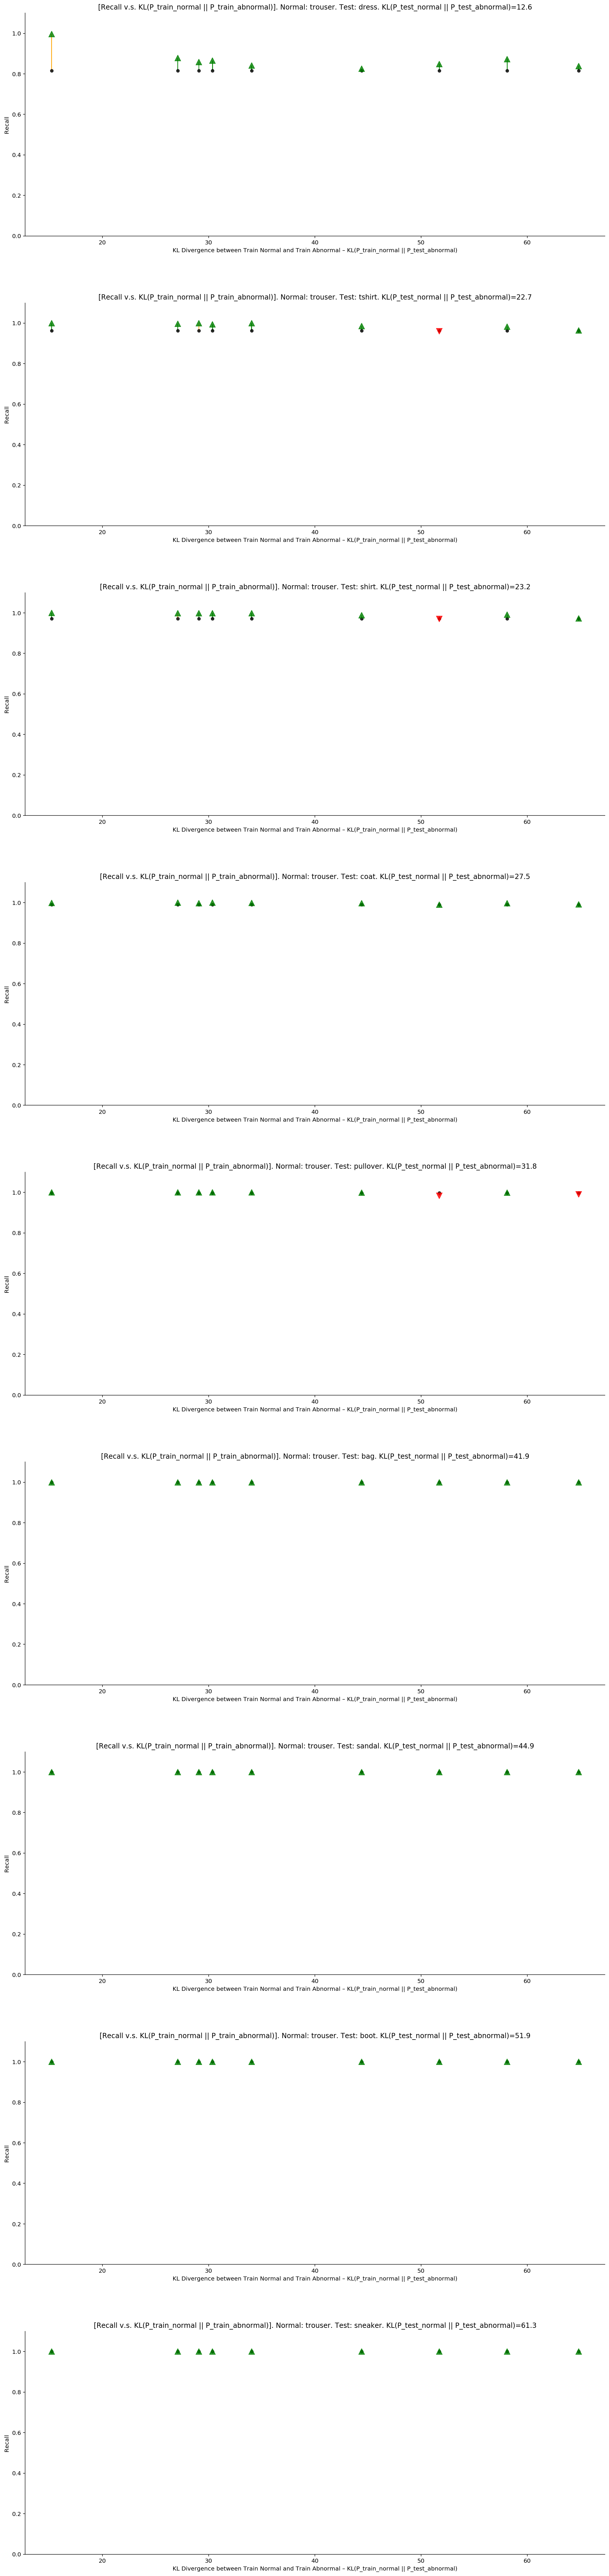

In [12]:
n = len(i_list)
fig, axes = plt.subplots(ncols=1, nrows=n, figsize=(18, 9 * n))
plt.subplots_adjust(hspace=0.3)

xlim_left = None
xlim_right = None

for ind, i in enumerate(i_list):
    y0 = np.array(y_un[i])
    y1 = np.array(y_semi[i])
    margin_x = np.array(x_margin[i])

    dy = y1 - y0
    pos_ind = np.where(dy >= 0)[0]
    nega_ind = np.where(dy < 0)[0]

    axes[ind].plot(margin_x[pos_ind], y0[pos_ind], '.', color='black', markersize=10, alpha=0.8)
    axes[ind].plot(margin_x[nega_ind], y0[nega_ind], '.', color='black', markersize=10, alpha=0.8)
    axes[ind].plot(margin_x[pos_ind], y1[pos_ind], '^', color='green', markersize=10, alpha=0.8)
    axes[ind].plot(margin_x[nega_ind], y1[nega_ind], 'v', color='red', markersize=10, alpha=0.8)
    
    for j in range(len(y0)):
        if j == ind_list_.index(i):
            axes[ind].arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
                  width=0.001, length_includes_head=True, head_length=0.01, color='orange')  
        elif y0[j] - y1[j] >= 0:
            axes[ind].arrow(margin_x[j], y0[j], 0, y1[j] - y0[j],
                  width=0.001, length_includes_head=True, head_length=0.01, color='red')
        else:
            axes[ind].arrow(margin_x[j], y0[j], 0, y1[j]-y0[j],
                  width=0.001, length_includes_head=True, head_length=0.01, color='green')

    axes[ind].set_ylim(0, 1.1)
    axes[ind].set_xlim(xlim_left, xlim_right)

    sns.despine()
    axes[ind].set_ylabel('Recall')
    axes[ind].set_xlabel('KL Divergence between Train Normal and Train Abnormal – KL(P_train_normal || P_test_abnormal)')
    axes[ind].set_title('[Recall v.s. KL(P_train_normal || P_train_abnormal)]. Normal: {}. Test: {}. KL(P_test_normal || P_test_abnormal)={}'.format(identifier_name, name_list[i], round(margin_test_for_identifier[i], 1)))